In [32]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import statistics as st
from datetime import datetime
import numpy as np
import os
from torchvision.datasets import ImageFolder
import torchvision.models as models

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [3]:
root_dir = "Various Animal"
os.listdir(root_dir)

['cane',
 'cavallo',
 'elefante',
 'farfalla',
 'gallina',
 'gatto',
 'mucca',
 'pecora',
 'ragno',
 'scoiattolo']

In [4]:
transforming = transforms.Compose([transforms.Resize(256),
                                   transforms.CenterCrop(225),
                                   transforms.ToTensor(),
                                   transforms.Normalize(mean=[0.485,0.456,0.406],
                                                       std=[0.229,0.224,0.225])
                                   
])

In [5]:
total_data = ImageFolder(root = os.path.join(root_dir),transform = transforming)
len(total_data)

26179

In [6]:
# n=0
# while n<20:
#     print(total_data[n][1])
#     n+=1

print(total_data.classes)
print(total_data.class_to_idx)

['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']
{'cane': 0, 'cavallo': 1, 'elefante': 2, 'farfalla': 3, 'gallina': 4, 'gatto': 5, 'mucca': 6, 'pecora': 7, 'ragno': 8, 'scoiattolo': 9}


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


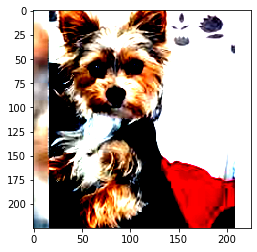

In [7]:
plt.imshow(np.transpose(total_data[0][0],(1,2,0)))

In [8]:
train = 22000
test = len(total_data)-train

training,testing = torch.utils.data.random_split(total_data,[train,test])

In [9]:
batch_size=20
training_data = DataLoader(training,batch_size=batch_size,shuffle=False,num_workers=1,pin_memory=True)
testing_data = DataLoader(testing,batch_size=batch_size,shuffle=False,num_workers=1,pin_memory=True)



In [10]:
for x,y in training_data:
    print(x.shape)
    print(y)
    break

torch.Size([20, 3, 225, 225])
tensor([4, 0, 8, 1, 0, 8, 8, 8, 1, 5, 2, 5, 7, 6, 2, 3, 2, 8, 4, 4])


In [11]:
[model for model in dir(models)]

['AlexNet',
 'DenseNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'quantization',
 'resnet',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext50_32x4d',
 'segmentation',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'shufflenet_v2_x1_5',
 'shufflenet_v2_x2_0',
 'shufflenetv2',
 'squeezenet',
 'squeezenet1_0',
 'squeezenet1_1',
 'utils',
 'vgg',
 'vgg11',
 'vgg11_bn',
 'vgg13',
 'vgg13_bn',
 'vgg16',
 'vg

In [12]:
den = models.densenet201(pretrained=True)
for para in den.parameters():
    para.require_grad=False

#check den structure
den

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [13]:
class mynetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(den.train(),
                                    nn.Linear(1000,500),
                                    nn.ReLU(),
                                    nn.Linear(500,10))
    def forward(self,x):
        return self.network(x)
model = mynetwork().to(device)
model

mynetwork(
  (network): Sequential(
    (0): DenseNet(
      (features): Sequential(
        (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu0): ReLU(inplace=True)
        (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
        (denseblock1): _DenseBlock(
          (denselayer1): _DenseLayer(
            (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (relu1): ReLU(inplace=True)
            (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (relu2): ReLU(inplace=True)
            (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          )
          (denselayer2): _DenseLayer(
     

In [14]:
losses = F.cross_entropy
opi = torch.optim.Adam(model.parameters(),lr=0.001)

In [16]:
num_epoch=10

for x in range(num_epoch):
    acc=[]
    n=0
    for data,target in training_data:
        mini_acc=[]
        data,target = data.to(device),target.to(device)
        model.train()
        preds = model(data)
        loss = losses(preds,target)
        loss.backward()
        opi.step()
        opi.zero_grad()
        __,predicts = torch.max(preds,dim=1)
        acc.append(torch.sum(predicts==target).item())
        mini_acc = torch.sum(predicts==target).item()/len(target)
        n+=1
        #print(mini_acc)
        if n%10==0:
            print("mini batch accuracy:{} and loss {}".format(mini_acc,loss.item()))
        
    if (x+1)%1==0:
        print("Epoch [{}/{}] with accuracy of{} and loss{}".format(x+1,num_epoch,sum(acc)/train,loss.item()))
        
    
        


mini batch accuracy:0.6 and loss 1.3229529857635498
mini batch accuracy:0.5 and loss 1.5113564729690552
mini batch accuracy:0.6 and loss 1.06233811378479
mini batch accuracy:0.65 and loss 1.1962049007415771
mini batch accuracy:0.45 and loss 1.2870802879333496
mini batch accuracy:0.6 and loss 1.225564956665039
mini batch accuracy:0.65 and loss 1.1392467021942139
mini batch accuracy:0.65 and loss 1.1259948015213013
mini batch accuracy:0.45 and loss 1.3881033658981323
mini batch accuracy:0.65 and loss 1.005366563796997
mini batch accuracy:0.5 and loss 1.4951226711273193
mini batch accuracy:0.85 and loss 0.6796962022781372
mini batch accuracy:0.65 and loss 1.2047375440597534
mini batch accuracy:0.7 and loss 0.9112194180488586
mini batch accuracy:0.8 and loss 0.9326197504997253
mini batch accuracy:0.45 and loss 2.032240629196167
mini batch accuracy:0.55 and loss 1.1708557605743408
mini batch accuracy:0.75 and loss 1.175126314163208
mini batch accuracy:0.65 and loss 1.1578881740570068
mini b

mini batch accuracy:0.7 and loss 0.86836177110672
mini batch accuracy:0.9 and loss 0.3633875548839569
mini batch accuracy:0.85 and loss 0.7409180402755737
mini batch accuracy:0.75 and loss 0.5630297660827637
mini batch accuracy:0.7 and loss 0.9905509948730469
mini batch accuracy:0.95 and loss 0.19862782955169678
mini batch accuracy:0.95 and loss 0.5009066462516785
mini batch accuracy:0.85 and loss 0.44073963165283203
mini batch accuracy:1.0 and loss 0.07523348927497864
mini batch accuracy:0.8 and loss 0.5858438014984131
mini batch accuracy:0.75 and loss 0.6577595472335815
mini batch accuracy:0.8 and loss 0.3121017515659332
mini batch accuracy:0.85 and loss 0.4808010160923004
mini batch accuracy:1.0 and loss 0.14838381111621857
mini batch accuracy:0.95 and loss 0.1509469449520111
mini batch accuracy:0.8 and loss 0.6434059143066406
mini batch accuracy:0.7 and loss 0.5843900442123413
mini batch accuracy:1.0 and loss 0.09743712842464447
mini batch accuracy:0.9 and loss 0.4012550413608551
m

mini batch accuracy:0.75 and loss 0.7855741381645203
mini batch accuracy:1.0 and loss 0.14603619277477264
mini batch accuracy:0.9 and loss 0.3809121549129486
mini batch accuracy:0.85 and loss 0.4100535809993744
mini batch accuracy:1.0 and loss 0.1419338434934616
mini batch accuracy:0.75 and loss 0.7697234153747559
mini batch accuracy:0.75 and loss 1.0208755731582642
mini batch accuracy:1.0 and loss 0.046136461198329926
mini batch accuracy:0.95 and loss 0.18893314898014069
mini batch accuracy:1.0 and loss 0.00835120677947998
mini batch accuracy:1.0 and loss 0.09780503809452057
mini batch accuracy:0.8 and loss 0.5255827903747559
mini batch accuracy:0.9 and loss 0.32019567489624023
mini batch accuracy:1.0 and loss 0.04708991199731827
mini batch accuracy:0.95 and loss 0.13626448810100555
mini batch accuracy:0.85 and loss 0.6472722291946411
mini batch accuracy:0.9 and loss 0.22146162390708923
mini batch accuracy:0.8 and loss 0.3971884846687317
mini batch accuracy:0.9 and loss 0.282973617315

mini batch accuracy:0.95 and loss 0.27843648195266724
mini batch accuracy:0.95 and loss 0.3450802266597748
mini batch accuracy:1.0 and loss 0.011340463533997536
mini batch accuracy:0.9 and loss 0.33789655566215515
mini batch accuracy:0.9 and loss 0.4225351810455322
mini batch accuracy:0.9 and loss 0.42578548192977905
mini batch accuracy:0.9 and loss 0.16334408521652222
mini batch accuracy:0.95 and loss 0.14411118626594543
mini batch accuracy:1.0 and loss 0.014581834897398949
mini batch accuracy:0.95 and loss 0.10521464049816132
mini batch accuracy:0.95 and loss 0.23995094001293182
mini batch accuracy:0.95 and loss 0.19624067842960358
mini batch accuracy:0.95 and loss 0.15699873864650726
mini batch accuracy:1.0 and loss 0.08895625919103622
mini batch accuracy:0.9 and loss 0.17015814781188965
mini batch accuracy:0.95 and loss 0.05421411991119385
mini batch accuracy:1.0 and loss 0.008563590236008167
mini batch accuracy:0.85 and loss 0.20128917694091797
mini batch accuracy:0.95 and loss 0.

In [48]:
mini_accc=[]
for x in acc:
    mini_accc.append(x/20)
len(mini_accc)

a = np.array_split(mini_accc,10)
hist=[]
for x in a:
    c=sum(x)/110
    hist.append(c)
print(hist)
print(a)
print(mini_accc)

[0.9231818181818189, 0.935909090909092, 0.9504545454545466, 0.9440909090909099, 0.947272727272728, 0.9590909090909099, 0.9577272727272739, 0.940909090909092, 0.9359090909090918, 0.9472727272727282]
[array([0.95, 1.  , 0.9 , 0.8 , 0.85, 0.9 , 1.  , 1.  , 1.  , 0.9 , 0.95,
       0.95, 0.95, 0.9 , 0.9 , 0.95, 1.  , 1.  , 0.85, 0.8 , 0.9 , 0.95,
       0.9 , 0.95, 0.9 , 0.9 , 0.95, 1.  , 0.95, 0.95, 0.85, 0.8 , 0.85,
       0.85, 0.85, 0.95, 1.  , 1.  , 0.8 , 0.9 , 0.85, 0.9 , 0.95, 0.9 ,
       0.95, 0.9 , 1.  , 0.9 , 0.85, 0.85, 0.95, 1.  , 0.9 , 1.  , 0.7 ,
       0.9 , 0.95, 0.95, 0.9 , 0.95, 0.85, 0.85, 0.9 , 1.  , 1.  , 0.9 ,
       0.85, 0.9 , 0.8 , 0.85, 1.  , 0.9 , 0.95, 0.9 , 0.95, 0.85, 0.95,
       0.95, 0.8 , 1.  , 0.95, 1.  , 0.85, 1.  , 1.  , 0.95, 0.95, 0.95,
       0.95, 1.  , 0.95, 0.9 , 0.95, 1.  , 0.95, 1.  , 0.9 , 0.9 , 0.9 ,
       1.  , 1.  , 0.95, 0.8 , 1.  , 0.9 , 0.95, 0.9 , 0.95, 0.95, 0.95]), array([0.95, 0.95, 1.  , 0.95, 0.95, 1.  , 0.95, 0.85, 0.95, 0.9 , 0.

In [49]:
acc

[19,
 20,
 18,
 16,
 17,
 18,
 20,
 20,
 20,
 18,
 19,
 19,
 19,
 18,
 18,
 19,
 20,
 20,
 17,
 16,
 18,
 19,
 18,
 19,
 18,
 18,
 19,
 20,
 19,
 19,
 17,
 16,
 17,
 17,
 17,
 19,
 20,
 20,
 16,
 18,
 17,
 18,
 19,
 18,
 19,
 18,
 20,
 18,
 17,
 17,
 19,
 20,
 18,
 20,
 14,
 18,
 19,
 19,
 18,
 19,
 17,
 17,
 18,
 20,
 20,
 18,
 17,
 18,
 16,
 17,
 20,
 18,
 19,
 18,
 19,
 17,
 19,
 19,
 16,
 20,
 19,
 20,
 17,
 20,
 20,
 19,
 19,
 19,
 19,
 20,
 19,
 18,
 19,
 20,
 19,
 20,
 18,
 18,
 18,
 20,
 20,
 19,
 16,
 20,
 18,
 19,
 18,
 19,
 19,
 19,
 19,
 19,
 20,
 19,
 19,
 20,
 19,
 17,
 19,
 18,
 19,
 18,
 18,
 20,
 20,
 20,
 20,
 18,
 19,
 19,
 20,
 18,
 18,
 16,
 20,
 19,
 19,
 19,
 20,
 19,
 19,
 20,
 19,
 19,
 18,
 17,
 19,
 17,
 19,
 18,
 19,
 17,
 19,
 19,
 18,
 18,
 17,
 17,
 20,
 19,
 20,
 18,
 20,
 17,
 20,
 18,
 19,
 17,
 19,
 15,
 18,
 18,
 18,
 19,
 20,
 19,
 20,
 19,
 18,
 19,
 19,
 18,
 19,
 18,
 20,
 19,
 18,
 19,
 19,
 19,
 19,
 17,
 19,
 16,
 19,
 19,
 20,
 18,
 20,
 19,


In [42]:
for x in a:
    print(x)
    break

[0.95 1.   0.9  0.8  0.85 0.9  1.   1.   1.   0.9  0.95 0.95 0.95 0.9
 0.9  0.95 1.   1.   0.85 0.8  0.9  0.95 0.9  0.95 0.9  0.9  0.95 1.
 0.95 0.95 0.85 0.8  0.85 0.85 0.85 0.95 1.   1.   0.8  0.9  0.85 0.9
 0.95 0.9  0.95 0.9  1.   0.9  0.85 0.85 0.95 1.   0.9  1.   0.7  0.9
 0.95 0.95 0.9  0.95 0.85 0.85 0.9  1.   1.   0.9  0.85 0.9  0.8  0.85
 1.   0.9  0.95 0.9  0.95 0.85 0.95 0.95 0.8  1.   0.95 1.   0.85 1.
 1.   0.95 0.95 0.95 0.95 1.   0.95 0.9  0.95 1.   0.95 1.   0.9  0.9
 0.9  1.   1.   0.95 0.8  1.   0.9  0.95 0.9  0.95 0.95 0.95]


In [20]:
###test###
with torch.no_grad():
    result=[]
    for x,y in testing_data:
        x,y=x.to(device),y.to(device)
        model.eval()
        prediction=model(x)
        __,predict=torch.max(prediction,dim=1)
        result.append(torch.sum(predict==y).item())
    print("Performance on testdata is:{}".format(sum(result)/test))

Performance on testdata is:0.8827470686767169
